In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/NLP/Shared Task

/content/drive/MyDrive/NLP/Shared Task


In [115]:
ls

 arguments-training.tsv
'Copy of NLI.ipynb'
'Copy of Task4 (Identification of Human Values behind Arguments).ipynb'
 labels-training.tsv
 level1-labels-training.tsv
 model.png
 README.md
'Task4 (Identification of Human Values behind Arguments).ipynb'
 value-categories.json


In [116]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [117]:
args_train = pd.read_csv("arguments-training.tsv", delimiter='\t')
args_train.head()

,Argument ID,Conclusion,Stance,Premise
0,A01001,Entrapment should be legalized,in favor of,if entrapment can serve to more easily capture...
1,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...
2,A01003,We should abandon marriage,against,marriage is the ultimate commitment to someone...
3,A01004,We should ban naturopathy,against,it provides a useful income for some people
4,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...


In [118]:
labels_train = pd.read_csv("labels-training.tsv", delimiter='\t')
labels_train.head()

,Argument ID,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01001,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,A01002,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,A01003,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,A01004,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,A01005,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [119]:
args_train.shape, labels_train.shape

((5220, 4), (5220, 21))

In [120]:
df = args_train.merge(labels_train, how='inner', on='Argument ID')
#df['Stance'] = df['Stance'].map({'in favor of': 1, 'against': 0})
df.head()

,Argument ID,Conclusion,Stance,Premise,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01001,Entrapment should be legalized,in favor of,if entrapment can serve to more easily capture...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,A01003,We should abandon marriage,against,marriage is the ultimate commitment to someone...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,A01004,We should ban naturopathy,against,it provides a useful income for some people,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [121]:
from sklearn.model_selection import train_test_split
import numpy as np

In [122]:
X = df[['Conclusion', 'Stance', 'Premise']]
Y = df.drop(['Argument ID', 'Conclusion', 'Stance', 'Premise'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [123]:
X_train.shape, y_train.shape

((4437, 3), (4437, 20))

In [124]:
X_test.shape, y_test.shape

((783, 3), (783, 20))

In [125]:
def unique_words_seperator(column):
    words_list = list(column.str.split(' ', expand=True).stack().unique())
  # In the following line, I am removing puncuation mark from the end or beginning of the words.
    rec_words_list = [w.strip('.,;()[]') for w in words_list]
    return rec_words_list

In [126]:
def common_words_finder(vocab1, vocab2):
    common_vocab = [word for word in vocab1 if word in vocab2] 
    return common_vocab

In [127]:
train_s2 = unique_words_seperator(X_train['Conclusion'])
train_s3 = unique_words_seperator(X_train['Stance'])
train_s1 = unique_words_seperator(X_train['Premise'])

train_vocab = train_s2 + train_s3 + train_s1
train_vocab = list(set(train_vocab))    # to only keep unique words

test_s2 = unique_words_seperator(X_test['Conclusion'])
test_s3 = unique_words_seperator(X_test['Stance'])
test_s1 = unique_words_seperator(X_test['Premise'])


test_vocab = test_s2 + test_s3 + test_s1
test_vocab = list(set(test_vocab))    # to only keep unique words

print("Number of unique words in dev set: ", str(len(train_vocab)))
print("Number of unique words in test set: ", str(len(test_vocab)))
print("Number of unique common words in dev and test set: ", str(len(common_words_finder(train_vocab, test_vocab))))
print("percentage of common words in test set: ", str(len(common_words_finder(train_vocab, test_vocab)) / len(test_vocab)))

Number of unique words in dev set:  7106
Number of unique words in test set:  2833
Number of unique common words in dev and test set:  2308
percentage of common words in test set:  0.8146840804800565


In [128]:
!pip install tf-models-official

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [129]:
!pip install bert-tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
!pip install bert-for-tf2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
import tensorflow as tf
import tensorflow_hub as hub
from official.nlp.configs import bert
from bert import bert_tokenization
import os

In [132]:
gs_folder_bert = "gs://cloud-tpu-checkpoints/bert/keras_bert/uncased_L-12_H-768_A-12"
tokenizer = bert_tokenization.FullTokenizer(vocab_file=os.path.join(gs_folder_bert, "vocab.txt"),
     do_lower_case=True)

In [133]:
def sentence_encoder(s, tokenizer):
  
    tokens = list(tokenizer.tokenize(str(s)))
    tokens.append('[SEP]')
    return tokenizer.convert_tokens_to_ids(tokens)

In [135]:
def bert_input_encoder(train_corpus, tokenizer):
    sentence1 = tf.ragged.constant([sentence_encoder(s, tokenizer) for s in np.array(train_corpus['Conclusion'])])
    sentence2 = tf.ragged.constant([sentence_encoder(s, tokenizer) for s in np.array(train_corpus['Stance'])])
    sentence3 = tf.ragged.constant([sentence_encoder(s, tokenizer) for s in np.array(train_corpus['Premise'])])

    cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])] * sentence1.shape[0]
    
    input_word_ids = tf.concat([cls, sentence1, sentence2, sentence3], axis=-1)

    input_mask = tf.ones_like(input_word_ids).to_tensor()

    segment_cls = tf.zeros_like(cls)
    segment_s1 = tf.zeros_like(sentence1)
    segment_s2 = tf.ones_like(sentence2)
    segment_s3 = tf.ones_like(sentence3)
    input_segment_ids = tf.concat([segment_cls, segment_s1, segment_s2, segment_s3], axis=-1).to_tensor()


    inputs_dic = {
        'input_word_ids': input_word_ids.to_tensor(),
        'input_mask': input_mask,
        'input_segment_ids': input_segment_ids,
    }

    return inputs_dic

In [136]:
X_train.shape

(4437, 3)

In [137]:
from tensorflow.keras.metrics import Precision, Recall
def inference_model_builder():
    max_seq_length = 173

    input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")
    input_segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_segment_ids")
    url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2"
    # url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
    bert_layer = hub.KerasLayer(url, trainable=True)
    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_segment_ids])
    clf_output = sequence_output[:, 0, :]
    net = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer='l2')(clf_output)
    net = tf.keras.layers.Dropout(0.2)(net)
    net = tf.keras.layers.Dense(128, activation='relu')(net)
    net = tf.keras.layers.Dropout(0.2)(net)
    out = tf.keras.layers.Dense(20, activation='softmax', kernel_regularizer='l2')(net)
    model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_segment_ids], outputs=[out])

    optimizer = tf.keras.optimizers.Adam(lr=1e-5)
    model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy', Recall(), Precision()])

    return model

In [138]:
model = inference_model_builder()
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 173)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 173)]        0           []                               
                                                                                                  
 input_segment_ids (InputLayer)  [(None, 173)]       0           []                               
                                                                                                  
 keras_layer_7 (KerasLayer)     [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 173, 768)]                'input_mask[0][0]',       

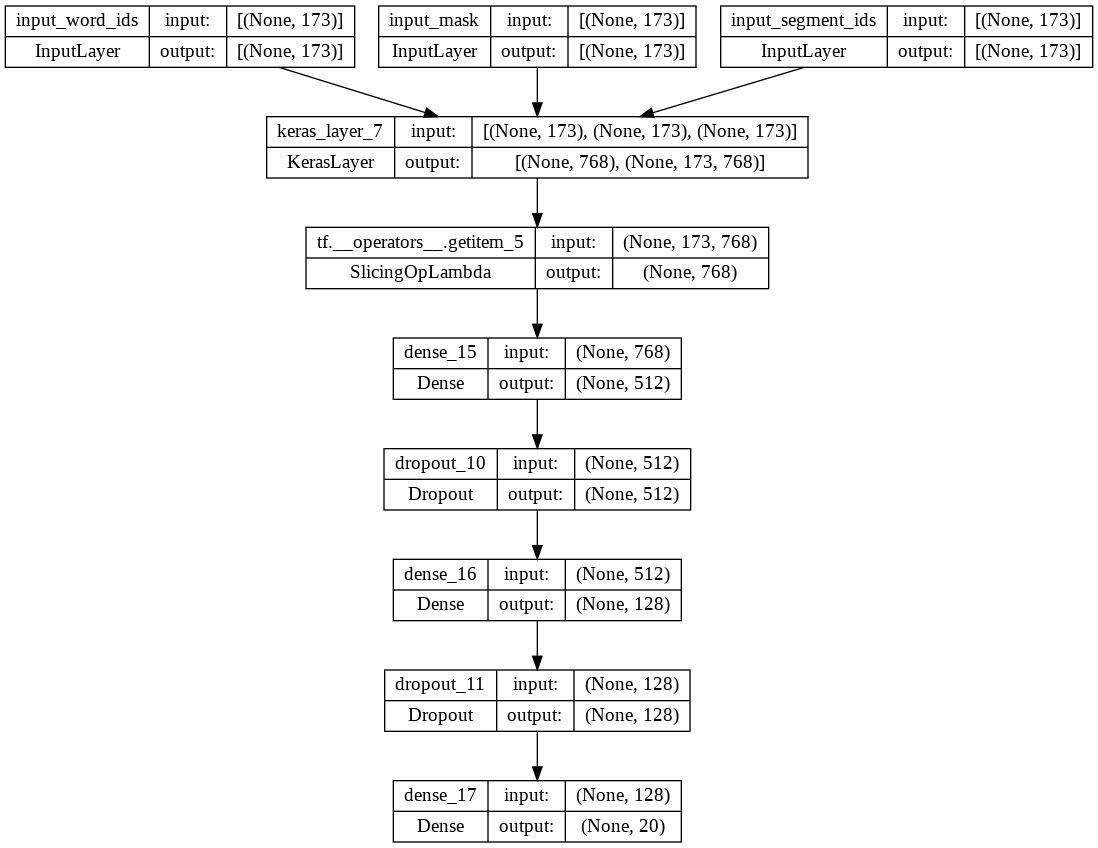

In [139]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [140]:
model_input = bert_input_encoder(X_train, tokenizer)
test_input = bert_input_encoder(X_test, tokenizer)

In [141]:
model_input

{'input_word_ids': <tf.Tensor: shape=(4437, 173), dtype=int32, numpy=
 array([[ 101, 2057, 2323, ...,    0,    0,    0],
        [ 101, 2057, 2323, ...,    0,    0,    0],
        [ 101, 2057, 2323, ...,    0,    0,    0],
        ...,
        [ 101, 2057, 2323, ...,    0,    0,    0],
        [ 101, 2057, 2323, ...,    0,    0,    0],
        [ 101, 2057, 2323, ...,    0,    0,    0]], dtype=int32)>,
 'input_mask': <tf.Tensor: shape=(4437, 173), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>,
 'input_segment_ids': <tf.Tensor: shape=(4437, 173), dtype=int32, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>}

In [142]:
model.fit(model_input, y_train.values, epochs=40, batch_size=32, verbose=1, validation_split=0.1)

Epoch 1/40
125/125 [==============================] - 190s 1s/step - loss: 5634.3857 - accuracy: 0.0836 - recall_5: 0.0859 - precision_5: 0.3091 - val_loss: 13571.6699 - val_accuracy: 0.0203 - val_recall_5: 0.1173 - val_precision_5: 0.3964
Epoch 2/40
125/125 [==============================] - 144s 1s/step - loss: 51982.2500 - accuracy: 0.0811 - recall_5: 0.0847 - precision_5: 0.2993 - val_loss: 2186.8450 - val_accuracy: 0.0203 - val_recall_5: 0.1173 - val_precision_5: 0.3964
Epoch 3/40
125/125 [==============================] - 150s 1s/step - loss: 26312.5996 - accuracy: 0.0831 - recall_5: 0.0861 - precision_5: 0.2958 - val_loss: 33246.1133 - val_accuracy: 0.0203 - val_recall_5: 0.1173 - val_precision_5: 0.3964
Epoch 4/40
125/125 [==============================] - 145s 1s/step - loss: 192991.2344 - accuracy: 0.0846 - recall_5: 0.0859 - precision_5: 0.2950 - val_loss: 186480.7500 - val_accuracy: 0.0203 - val_recall_5: 0.1173 - val_precision_5: 0.3964
Epoch 5/40
125/125 [================